In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000720672"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000720672
SIC,6211
Description,"SECURITY BROKERS, DEALERS & FLOTATION COMPANIES"
Name,STIFEL FINANCIAL CORP
Ticker,SF


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,47.0,2.469468e+01,8.261569e+00,11.99,16.56,2.563000e+01,3.111000e+01,3.741000e+01
interest income,65.0,3.937022e+07,4.767290e+07,2998000.00,7191000.00,1.885600e+07,4.493400e+07,1.910710e+08
net income,67.0,2.582666e+07,2.730949e+07,-1988000.00,5274000.00,1.775600e+07,3.880650e+07,1.140620e+08
net interest income,35.0,4.983223e+07,3.839044e+07,10277000.00,19714000.00,3.632600e+07,8.422150e+07,1.345640e+08
provision for loan losses,9.0,5.107667e+06,1.979122e+06,2043000.00,4277000.00,5.340000e+06,6.134000e+06,7.990000e+06
total revenue,67.0,3.487586e+08,2.588022e+08,102400.00,67984500.00,3.342140e+08,5.823960e+08,8.040850e+08


# Plots

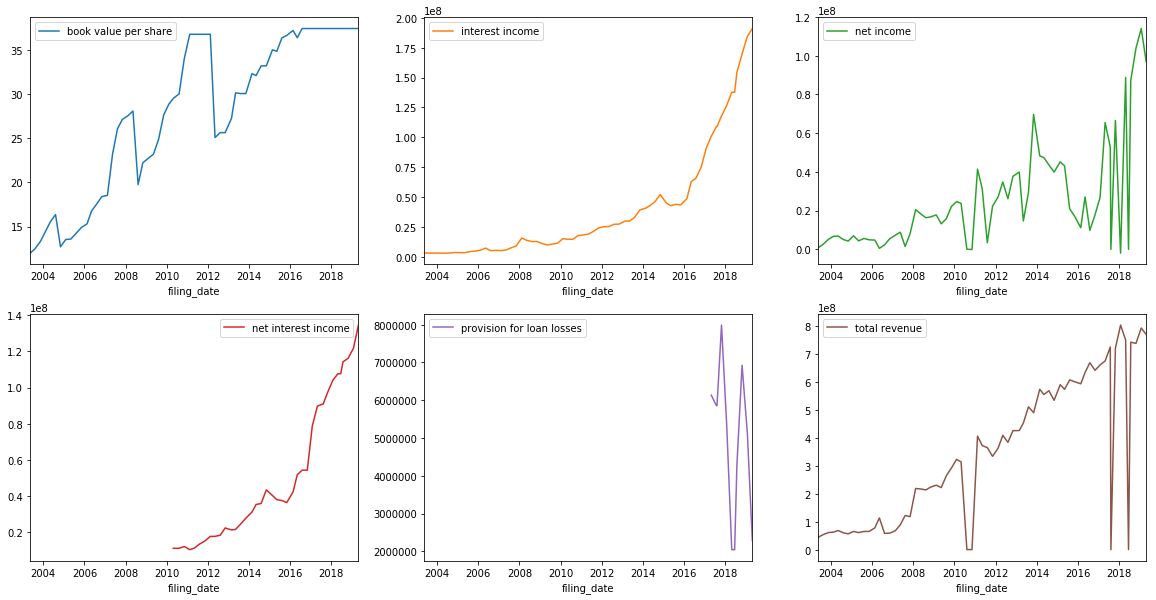

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0000720672 book value per share        2011Q1 to 2011Q4: 4 periods    missing   
           book value per share                             2012Q3    missing   
           book value per share                             2013Q3    missing   
           book value per share                             2014Q3    missing   
           book value per share       2016Q3 to 2019Q1: 11 periods    missing   
           net income                                       2016Q4  duplicate   
           net income                                       2017Q4  duplicate   
           net interest income        2003Q1 to 2009Q4: 28 periods    missing   
           net interest income                              2010Q2    missing   
           net interest income                              2016Q3    missing   
           provision for loan losses  2003Q1 to 2016Q4: 56 periods    missing   
           total revenue                                    2016Q4  duplicate   
           total revenue                                    2017Q4  duplicate   

                                               message  
cik        item                                         
0000720672 book value per share         Missing period  
           book value per share         Missing period  
           book value per share         Missing period  
           book value per share         Missing period  
           book value per share         Missing period  
           net income                 Duplicate period  
           net income                 Duplicate period  
           net interest income          Missing period  
           net interest income          Missing period  
           net interest income          Missing period  
           provision for loan losses    Missing period  
           total revenue              Duplicate period  
           total revenue              Duplicate period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()